# **Deep Neural Network for MNIST Classification**

We'll apply all the knowledge from the lectures in this section to write a deep neural network. The problem we've chosen is referred to as the "Hello World" of deep learning because for most students it is the first deep learning algorithm they see.

The dataset is called MNIST and refers to handwritten digit recognition. You can find more about it on Yann LeCun's website (Director of AI Research, Facebook). He is one of the pioneers of what we've been talking about and of more complex approaches that are widely used today, such as covolutional neural networks (CNNs). 

The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image). 

The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes. 

Our goal would be to build a neural network with 2 hidden layers.

##Importing libraries

In [1]:
import numpy as np 
import tensorflow as tf
import tensorflow_datasets as tfds

##Importing Data

In [10]:
mnist_dataset,mnist_info=tfds.load(name='mnist',with_info=True,as_supervised=True)

In [11]:
mnist_train,mnist_test=mnist_dataset['train'],mnist_dataset['test']

num_validation=0.1* mnist_info.splits['train'].num_examples
num_validation=tf.cast(num_validation,tf.int64) 

num_test=mnist_info.splits['test'].num_examples
num_test=mnist_info=tf.cast(num_test,tf.int64)


def scale(image,label):
  image =tf.cast(image,tf.float32)
  image/=255
  return image,label


scaled_train_and_validation_data=mnist_train.map(scale)

test_data = mnist_test.map(scale)


In [13]:
BUFFER_SIZE=10000

shuffle_train_and_validation_data=scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data=shuffle_train_and_validation_data.take(num_validation)
train_data=shuffle_train_and_validation_data.skip(num_validation)

BATCH_SIZE=100

train_data=train_data.batch(BATCH_SIZE)
validation_data=validation_data.batch(num_validation)
test_data=test_data.batch(num_test)

validation_inputs,validation_targets=next(iter(validation_data))


# Model

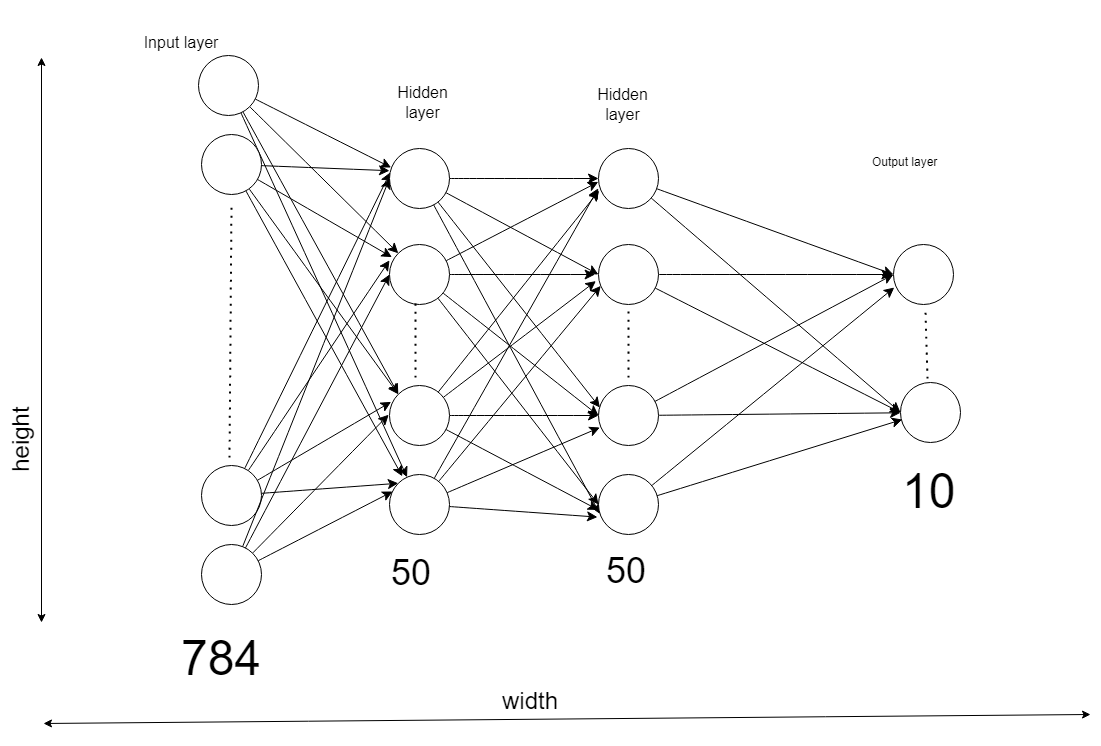

Outline the model

In [57]:
input_size=784
output_size=10
hidden_layer_size=400


model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='tanh'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])


Choose the Optimizer and the loss Function

In [58]:
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [59]:
model.compile(optimizer=custom_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##Training

In [60]:
NUM_EPOCHS=10

model.fit(train_data,epochs = NUM_EPOCHS,validation_data=(validation_inputs,validation_targets),verbose=2)

Epoch 1/10
540/540 - 16s - loss: 0.2174 - accuracy: 0.9335 - val_loss: 0.0991 - val_accuracy: 0.9698 - 16s/epoch - 30ms/step
Epoch 2/10
540/540 - 11s - loss: 0.0831 - accuracy: 0.9735 - val_loss: 0.0751 - val_accuracy: 0.9765 - 11s/epoch - 21ms/step
Epoch 3/10
540/540 - 11s - loss: 0.0561 - accuracy: 0.9821 - val_loss: 0.0591 - val_accuracy: 0.9835 - 11s/epoch - 21ms/step
Epoch 4/10
540/540 - 13s - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0552 - val_accuracy: 0.9850 - 13s/epoch - 25ms/step
Epoch 5/10
540/540 - 11s - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0423 - val_accuracy: 0.9867 - 11s/epoch - 21ms/step
Epoch 6/10
540/540 - 10s - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0390 - val_accuracy: 0.9883 - 10s/epoch - 19ms/step
Epoch 7/10
540/540 - 11s - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0370 - val_accuracy: 0.9882 - 11s/epoch - 20ms/step
Epoch 8/10
540/540 - 11s - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0298 - val_accuracy: 0.9913 - 11s/epoch - 21ms/step


In [61]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 400)               314000    
                                                                 
 dense_41 (Dense)            (None, 400)               160400    
                                                                 
 dense_42 (Dense)            (None, 400)               160400    
                                                                 
 dense_43 (Dense)            (None, 10)                4010      
                                                                 
Total params: 638,810
Trainable params: 638,810
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.save('mnist.h5')

In [63]:
from google.colab import files
files.download('mnist.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>